**NOTES**

Using this notebook with CASIAv2.0 dataset requires a runtime with at least 4Gb of system RAM and 64GB of disk. With a CPU runtime on Google Colab, it took around 5 minutes (or 0.006 compute units) to run the whole notebook.


In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import cv2

IMAGE_SIZE = (384, 256)
BAND_WIDTH = 10

def process_image(directory, file):
  image_filename = directory + '/' + file
  image = cv2.imread(image_filename)
  image = cv2.resize(image, IMAGE_SIZE, interpolation=cv2.INTER_LANCZOS4)
  array = generate_masked_image_with_contrast_bands(image, BAND_WIDTH)
  return array.astype(np.uint8)

def generate_masked_image_with_contrast_bands(image, extend_radius=3):
    # Compute the gradient magnitude
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Determine thresholds dynamically
    t1 = gradient_magnitude.max() * 0.85
    t2 = gradient_magnitude.max() * 0.95
    mask = cv2.Canny(image, threshold1=t1, threshold2=t2)

    # Extend the mask using dilation (avoiding manual loops)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2 * extend_radius + 1, 2 * extend_radius + 1))
    extended_mask = cv2.dilate(mask, kernel)

    # Create the extended image
    extended_image = np.zeros_like(image)
    extended_image[extended_mask > 0] = image[extended_mask > 0]

    return extended_image

In [ ]:
import tensorflow as tf

# Specify the path to the saved model file
binary_classifier_model_path = "/content/gdrive/MyDrive/TFM/FINAL___binary_classifier_model_for_tampering_detection_based_on_pfa.keras"

# Load the model
binary_classifier_model = tf.keras.models.load_model(binary_classifier_model_path)

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

EXPERIMENTATION_SET = []

#directory = Path("/content/gdrive/My Drive/TFM/photos")
#directory = Path("/content/gdrive/My Drive/TFM/twitter")
directory = Path("/content/gdrive/My Drive/TFM/taken")

for path in directory.rglob("*"):
    if path.is_file():
        dir_path = str(path.parent)  # Parent directory of the file
        file_name = str(path.name)   # File name
        if file_name.lower().endswith((".jpg", ".jpeg", ".png")):
            EXPERIMENTATION_SET.append(process_image(dir_path, file_name))

preds = binary_classifier_model.predict(np.array(EXPERIMENTATION_SET))
binary_classes = (preds >= 0.49).astype(int)

print(binary_classes) #binary classifier

1/1 [==============================] - 2s 2s/step
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


In [ ]:
from tensorflow.keras.models import load_model

# Specify the path to the saved model file
localizer_model_path = "/content/gdrive/MyDrive/TFM/FINAL___localizer_model_for_tampering_detection_based_on_pfa.keras"

# Load the model
localizer_model = load_model(localizer_model_path)

Image 1 : /content/gdrive/My Drive/TFM/taken / IMG_20240929_173324.jpg
Image 2 : /content/gdrive/My Drive/TFM/taken / IMG_20241002_192651.jpg
Image 3 : /content/gdrive/My Drive/TFM/taken / IMG_20241009_181508.jpg
Image 4 : /content/gdrive/My Drive/TFM/taken / IMG_20241012_174248.jpg
Image 5 : /content/gdrive/My Drive/TFM/taken / IMG_20241019_095853.jpg
Image 6 : /content/gdrive/My Drive/TFM/taken / IMG_20241019_121942.jpg
Image 7 : /content/gdrive/My Drive/TFM/taken / IMG_20241019_122055.jpg
Image 8 : /content/gdrive/My Drive/TFM/taken / IMG_20241102_150638.jpg
Image 9 : /content/gdrive/My Drive/TFM/taken / IMG_20241210_182503.jpg
Image 10 : /content/gdrive/My Drive/TFM/taken / IMG_20241227_173455.jpg
Image 11 : /content/gdrive/My Drive/TFM/taken / IMG_20241225_214023.jpg
Image 12 : /content/gdrive/My Drive/TFM/taken / IMG_20250101_000750.jpg
1/1 [==============================] - 2s 2s/step


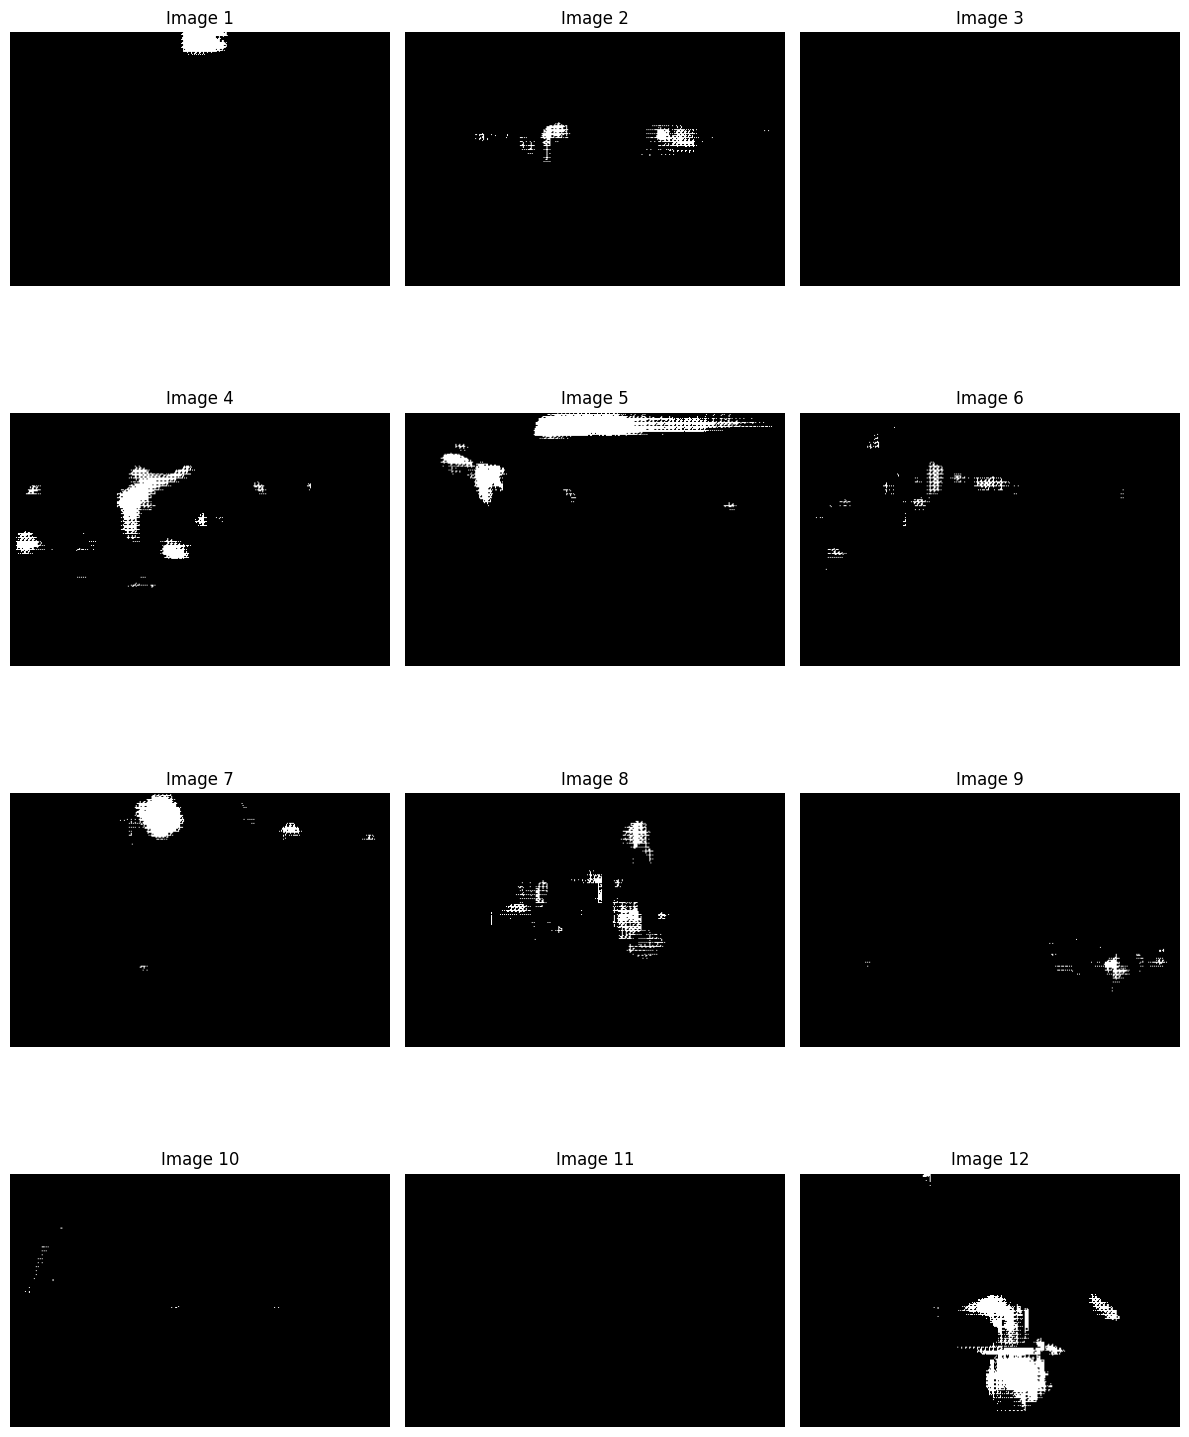

In [ ]:
import math
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

EXPERIMENTATION_SET = []

#directory = Path("/content/gdrive/My Drive/TFM/photos")
#cols = 3

#directory = Path("/content/gdrive/My Drive/TFM/twitter")
#cols = 8

directory = Path("/content/gdrive/My Drive/TFM/taken")
cols = 3

# Assuming process_image(dir_path, file_name) is defined and processes the images
i = 1
for path in directory.rglob("*"):
    if path.is_file():
        dir_path = str(path.parent)  # Parent directory of the file
        file_name = str(path.name)   # File name
        if file_name.lower().endswith((".jpg", ".jpeg", ".png")):
            print("Image", i, ":", dir_path, "/", file_name)
            i = i + 1
            EXPERIMENTATION_SET.append(process_image(dir_path, file_name))

# Predict and classify
preds = localizer_model.predict(np.array(EXPERIMENTATION_SET))
binary_classes = (preds >= 0.57).astype(int)

# Calculate grid dimensions
num_images = len(binary_classes)
rows = math.ceil(num_images / cols)

# Create the grid dynamically
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Plot each image in its respective subplot
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(binary_classes[i], cmap='gray')  # Display the image (grayscale)
        ax.axis('off')  # Turn off axes for better visualization
        ax.set_title(f"Image {i+1}")  # Add a title for each image
    else:
        ax.axis('off')  # Turn off unused subplots

# Adjust spacing between subplots
plt.tight_layout()
plt.show()